In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
import netCDF4 as nc4

# https://mpl-point-clicker.readthedocs.io/en/latest/
from mpl_point_clicker import clicker
from mpl_interactions import zoom_factory, panhandler

In [2]:
pmm = "../eORCA1.4.2_ModifStraits_mesh_mask.nc"
#pmm = "../eORCA1.4.2_ModifStraits_domain_cfg.nc"

mm = nc4.Dataset(pmm)

e3t = mm.variables['e3t_0'][0] 
e3t_1d = mm.variables['e3t_1d'][0] 
e3w_1d = mm.variables['e3w_1d'][0]
nK = np.shape(e3t_1d)
#
totl = mm.variables['tmaskutil'][0]  # 
botl = mm.variables['mbathy'][0] # goes from 0 to 74 (75 levels)
nJ,nI = np.shape(botl)
#nJ,nI = np.shape(botl) # j=0 Antartique, nJ-1 Arctique

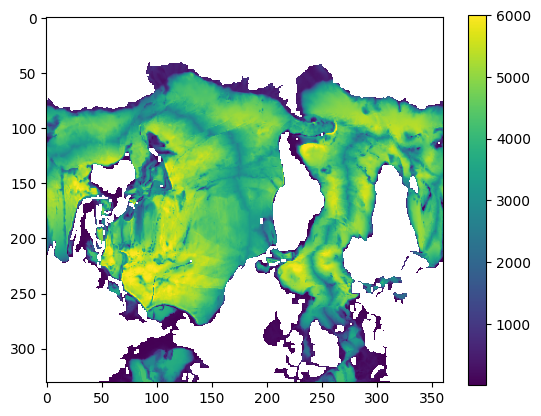

In [3]:
depw = np.zeros((nJ,nI)) ; dept = np.zeros((nJ,nI))
# z : PYTHON+1=NEMO
for j in range(nJ):
    for i in range(nI):
        k0 = botl[j,i]
        # botl[j,i] est la dernière cellule mouillé NEMO
        # botl[j,i]-1 dans python
        # botl[j,i]-1+1 pour le slicing
        depw[j,i] = np.sum(e3t[:k0,j,i])
        
mbathy = np.ma.masked_where(totl==0,depw)
plt.imshow(mbathy) 
plt.colorbar()

In [14]:
mbathy.data

array([[1.02390661, 1.02390661, 1.02390661, ..., 1.02390661, 1.02390661,
        1.02390661],
       [1.02390661, 1.02390661, 1.02390661, ..., 1.02390661, 1.02390661,
        1.02390661],
       [1.02390661, 1.02390661, 1.02390661, ..., 1.02390661, 1.02390661,
        1.02390661],
       ...,
       [1.02390661, 1.02390661, 1.02390661, ..., 1.02390661, 1.02390661,
        1.02390661],
       [1.02390661, 1.02390661, 1.02390661, ..., 1.02390661, 1.02390661,
        1.02390661],
       [1.02390661, 1.02390661, 1.02390661, ..., 1.02390661, 1.02390661,
        1.02390661]])

In [4]:
with open('mbathy.npy', 'wb') as f:
    np.save(f, mbathy.data,allow_pickle=True)
with open('mbathy_mask.npy', 'wb') as f:
    np.save(f, mbathy.mask,allow_pickle=True)
print("saved")

saved


In [5]:
with open('rpot.npy', 'rb') as f:
    rpot = np.load(f,allow_pickle=True)

In [6]:
Ht = np.zeros((nJ,nI))
bath = np.zeros((nJ,nI))

for i in range(nI):
    for j in range(nJ):
        Ht[j,i] = np.sum(rpot[:,j,i]*e3t_1d[:])
        k0 = botl[j,i]  # niveau NEMO (donc 1->jpk), en python transparent
        bath[j,i] = np.sum(e3t[:k0+1,j,i]) # idem
        #bath[j,i] = np.sum(e3t_1d[:k0]) + e3t[k0,j,i]

<IPython.core.display.Javascript object>


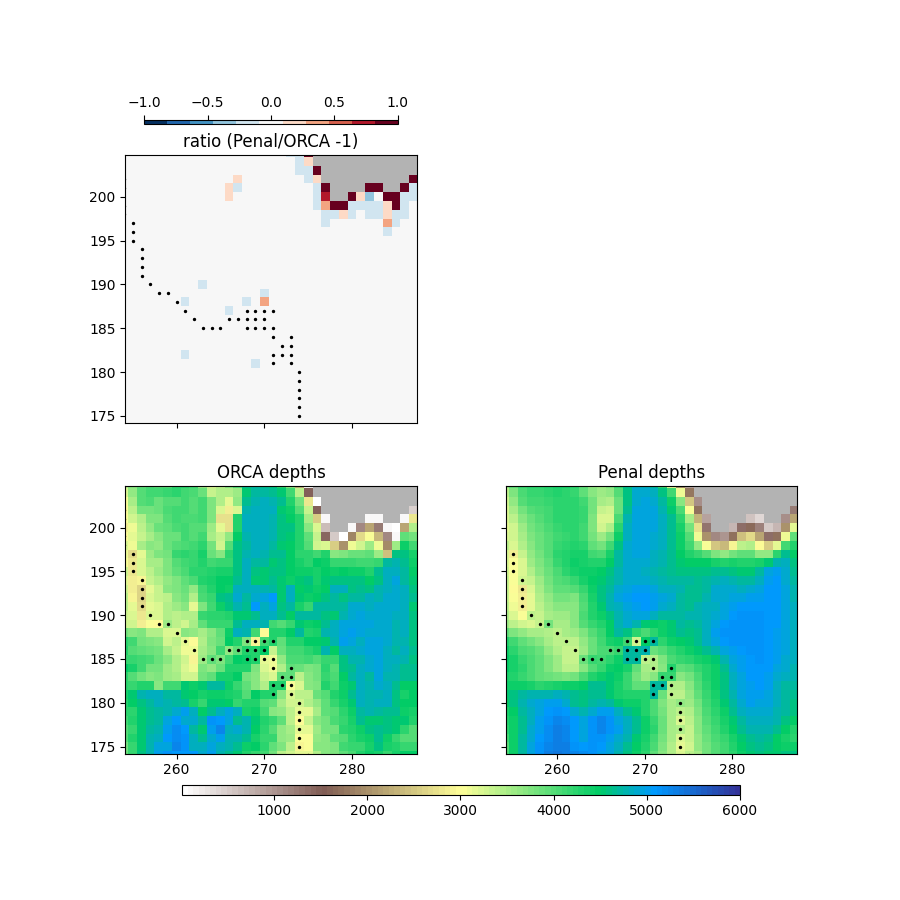

In [7]:
%matplotlib notebook
palette = plt.get_cmap("terrain_r",100)
diffett = plt.get_cmap("RdBu_r",11)
data1 =np.ma.masked_where(totl==0.,bath)
data2 =np.ma.masked_where(totl==0.,Ht)
data3 =np.ma.masked_where(totl==0.,Ht/bath -1.)
#data3 = np.ma.masked_where( (Ht/bath>10.) | (totl==0.) ,Ht/bath)
#data3 = np.ma.masked_where( (Ht/bath>10.) ,Ht/bath - 1.)  

#data1 = bath
#data2 = Ht
#data3 = Ht/bath

try : 
    with open('protected_cells.npy', 'rb') as f:
        protected_nodes = np.load(f)
except :
    protected_nodes = []
    print("list not found")
    
fig, ax = plt.subplots(2,2,figsize=(9,9),sharex=True, sharey=True)
a1 = ax[1,0].imshow(data1, cmap = palette)
a2 = ax[1,1].imshow(data2, cmap = palette)
a3 = ax[0,0].imshow(data3, cmap = diffett,vmin=-1,vmax=1)
ax[0,0].invert_yaxis() # shared axis
ax[0,1].axis('off')

fig.colorbar(a2, ax=ax[1,:],shrink=0.8, location='bottom',aspect = 60, fraction=0.05,pad = 0.1)
fig.colorbar(a3, ax=ax[0,0],shrink=0.8, location='top'   ,aspect = 60, fraction=0.05,pad = 0.1)

ax[1,0].set_title("ORCA depths")
ax[1,1].set_title("Penal depths")
ax[0,0].set_title("ratio (Penal/ORCA -1)")

for a,b in [[0,0],[1,0],[1,1]] :
    zoom_factory(ax[a,b])
    ax[a,b].patch.set_color('0.7')
    ax[a,b].scatter(protected_nodes[:,0],
                    protected_nodes[:,1],color="k", s=2)

#plt.subplots_adjust(bottom=0.5, right=0.8, top=0.1)
#fig.tight_layout()

In [24]:
nbc = np.zeros((nJ,nI))
for i in range(nI):
    for j in range(nJ):
        nbc[j,i] = np.sum((rpot[:,j,i]<1.) * (rpot[:,j,i]>0.))

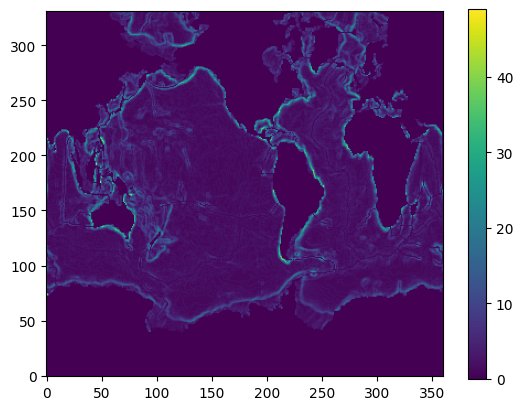

In [31]:
fig, ax = plt.subplots()
im = ax.imshow(nbc)
plt.colorbar(im)
ax.invert_yaxis()

In [29]:
last_e3t = np.zeros((nJ,nI))

for j in range(nJ):
    for i in range(nI):
        last_e3t[j,i] = e3t[botl[j,i],j,i]/e3t_1d[botl[j,i]]

In [54]:
len(rpot[:kk0,80,80])

48

In [56]:
np.arange(5)[:3]

array([0, 1, 2])

In [38]:
np.argsort(rpot[:,80,80])

array([74, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 55, 62, 61, 71,
       70, 69, 68, 72, 66, 65, 64, 63, 67, 73, 47, 46, 45, 44, 43, 42, 41,
       38, 40, 39,  0, 35, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,
        3,  2,  1, 16, 36, 17, 19, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25,
       24, 23, 22, 21, 20, 18, 37])

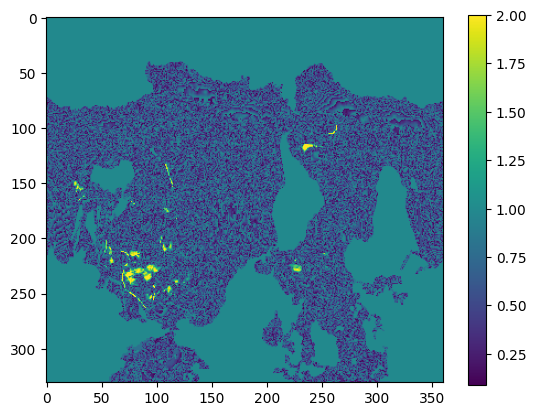

In [33]:
%matplotlib inline
plt.imshow(last_e3t)
plt.colorbar()

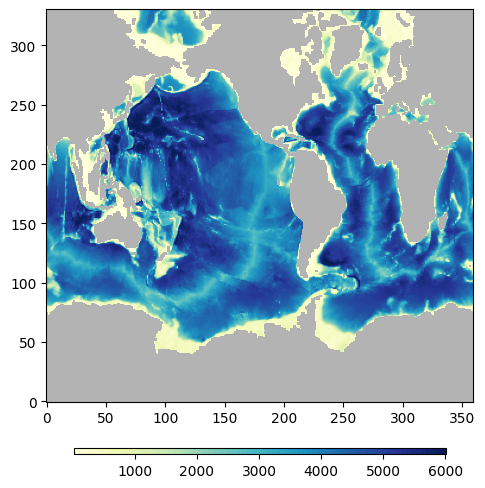

In [25]:
pmm = "../eORCA1.4.2_ModifStraits_mesh_mask.nc"
#pmm = "../eORCA1.4.2_ModifStraits_domain_cfg.nc"

mm = nc4.Dataset(pmm)
botl = mm.variables['mbathy'][0] # goes from 0 to 74 (75 levels)
gdepw = mm.variables['gdepw_0'][0] # goes from 0 to 74 (75 levels)
nJ,nI = np.shape(botl) # j=0 Antartique, nJ-1 Arctique
bath = np.zeros((nJ,nI))
for i in range(nI):
    for j in range(nJ):
        bath[j,i] = gdepw[botl[j,i],j,i]
bath =np.ma.masked_where(botl==1,bath)
# twilight, gnuplot, gist_heat, hsv
palette = plt.get_cmap("YlGnBu",75)
%matplotlib inline
fig, ax = plt.subplots(figsize=(6,6))
cf = plt.imshow(bath, cmap=palette)
ax.invert_yaxis()
fig.colorbar(cf,orientation="horizontal",shrink=0.8, location='bottom',aspect = 60, fraction=0.05,pad = 0.1)
ax.set_aspect(aspect='equal')


ax.patch.set_color('0.7')


plt.show()

<IPython.core.display.Javascript object>


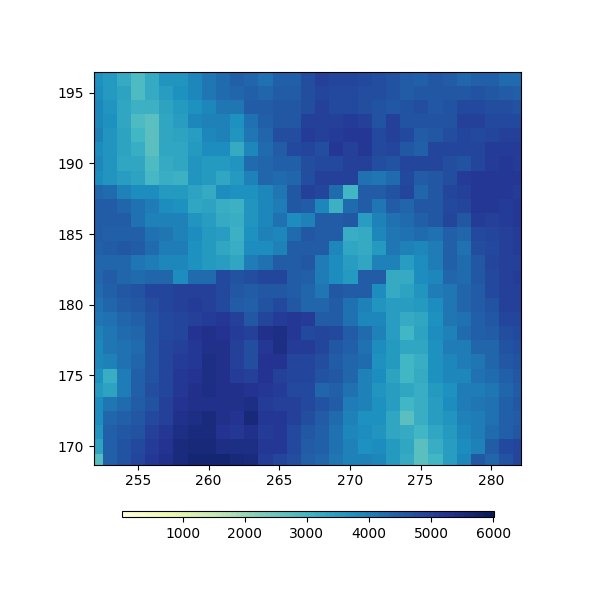

In [36]:
pmm = "../eORCA1.4.2_ModifStraits_mesh_mask.nc"
#pmm = "../eORCA1.4.2_ModifStraits_domain_cfg.nc"

mm = nc4.Dataset(pmm)
botl = mm.variables['mbathy'][0] # goes from 0 to 74 (75 levels)
gdepw = mm.variables['gdepw_0'][0] # goes from 0 to 74 (75 levels)
nJ,nI = np.shape(botl) # j=0 Antartique, nJ-1 Arctique
bath = np.zeros((nJ,nI))
for i in range(nI):
    for j in range(nJ):
        bath[j,i] = gdepw[botl[j,i],j,i]
bath =np.ma.masked_where(botl==1,bath)
# twilight, gnuplot, gist_heat, hsv
palette = plt.get_cmap("YlGnBu",75)
%matplotlib notebook
fig, ax = plt.subplots(figsize=(6,6))
cf = plt.imshow(bath, cmap=palette)
ax.invert_yaxis()
fig.colorbar(cf,orientation="horizontal",shrink=0.8, location='bottom',aspect = 60, fraction=0.05,pad = 0.1)
ax.set_aspect(aspect='equal')
ax.patch.set_color('0.7')

zoom_factory(ax)
#plt.contour(bath,levels=[4000.,4500,5000],colors = 'w',linewidths=1.)

plt.show()

In [ ]:
try : 
    with open('protected_cells.npy', 'rb') as f:
        protected_nodes = np.load(f)
    plt.scatter(protected_nodes[:,0],protected_nodes[:,1],color="k")
except :
    print("list not found")

# add zooming and middle click to pan
zoom_factory(ax)
ph = panhandler(fig, button=2)

klicker = clicker(ax, ["nodes","to remove"], markers=["o","x"], colors=["red","red"])